In [1]:
import spacy
import string
import pandas as pd

In [2]:
df = pd.read_csv('data/authors.csv')
df.head(5)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
spacy_stopwords = nlp.Defaults.stop_words
punctuations = string.punctuation

In [5]:
_id = df.iloc[0][0]
text = df.iloc[0][1]
target = df.iloc[0][2]
print(_id,text,target)

id26305 This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall. EAP


In [6]:
def tokenizer(text): 
    doc = nlp(text)   
    tokens = []
    for token in doc:
        if token.is_stop!=True and token.text not in punctuations:
            tokens.append(token.lemma_)
            #print(token.text,token.lemma_)
    return tokens

In [7]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder
y = df['author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
EAP


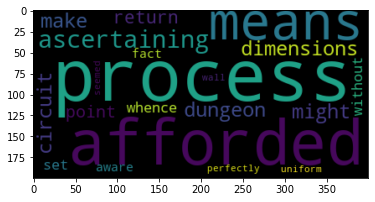

It never once occurred to me that the fumbling might be a mere mistake.
HPL


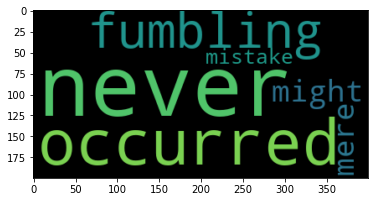

How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.
MWS


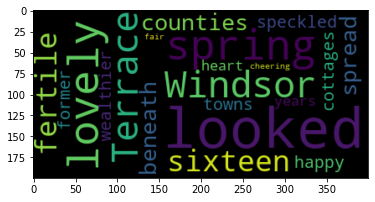

In [8]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
X = df['text']
wordcloud1 = WordCloud().generate(X[0]) # for EAP
wordcloud2 = WordCloud().generate(X[1]) # for HPL
wordcloud3 = WordCloud().generate(X[3]) # for MWS 
print(X[0])
print(df['author'][0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()
print(X[1])
print(df['author'][1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()
print(X[3])
print(df['author'][3])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [10]:
y = df['author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.25, random_state=12345)

bow_transformer=CountVectorizer(analyzer=tokenizer).fit(X_train)

text_bow_train=bow_transformer.transform(X_train)

text_bow_test=bow_transformer.transform(X_test)

In [12]:
model = MultinomialNB()
model = model.fit(text_bow_train, y_train)

In [13]:
model.score(text_bow_train, y_train)

0.9012530645600654

In [14]:
model.score(text_bow_test, y_test)

0.8283963227783453

In [15]:

from sklearn.metrics import classification_report
predictions = model.predict(text_bow_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1976
           1       0.85      0.82      0.83      1410
           2       0.79      0.87      0.83      1509

    accuracy                           0.83      4895
   macro avg       0.83      0.83      0.83      4895
weighted avg       0.83      0.83      0.83      4895

